# TASK
- Based on the dataset, find any insight about number of sale of different zone between males and females, member and non-member in this concert.
- Please define the "sale speed" of each zone. Provide the detail about how your group will define the "sale speed" carefully, and be creative !!:
- Use your defined "sale speed' to compare the ticket sale of different zones. find any interesting insight from the result.

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

file_name = "girlgeneration.csv"
df = pd.read_csv(file_name, index_col=0)
df.head()

,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,TICKET_BOOTH_RUNNING_NUM,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
SERIAL_ID,,,,,,,,,,,,,,,,,,,,,
331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41139,...,1,10,NaN,5,61,300.0,26237,0,male,2103
332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41138,...,1,10,NaN,5,61,300.0,26237,0,male,2103
378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39579,...,10,129,NaN,10,129,434.0,24923,0,male,2682
379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39580,...,10,129,NaN,10,129,434.0,24923,0,male,2682
586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:28:56.,2010/10/17,15:00,39596,...,2,14,NaN,2,14,201.0,24930,0,male,718


# Data cleaning

## Delete all columns with the same value

In [3]:
sup_col = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=sup_col)

In [4]:
for column in df.columns:
    print(column)

ORDER_ID
TICKET_ITEM_ID
PRINT_TIMES
IDENTITY
CREATE_DATE
TICKET_BOOTH_RUNNING_NUM
PRICE
T_STANDARD_TICKET_TYPE_NAME
SEAT_REGION_NAME
SEAT_ROW
SEAT_NO
TICKET_SHIPPING_RATE_ID
TICKET_FEE
SHIPPING_ZIP1
SHIPPING_COUNTRY_ID1
SHIPPING_TOWN_ID1
RECEIPT_TITLE
SHIPPING_COUNTRY_ID2
SHIPPING_TOWN_ID2
SHIPPING_ZIP2
ORDER_NUM
TICKET_ENTRANCE_NO
SEX
ADDRESS


In [5]:
columToDrop = [
    "ORDER_ID",
    "TICKET_ITEM_ID",
    "PRINT_TIMES",
    "IDENTITY",
    "CREATE_DATE",
    "TICKET_BOOTH_RUNNING_NUM",
    "PRICE",
    "SEAT_ROW",
    "SEAT_NO",
    "TICKET_SHIPPING_RATE_ID",
    "TICKET_FEE",
    "SHIPPING_ZIP1",
    "SHIPPING_COUNTRY_ID1",
    "SHIPPING_TOWN_ID1",
    "RECEIPT_TITLE",
    "SHIPPING_COUNTRY_ID2",
    "SHIPPING_TOWN_ID2",
    "SHIPPING_ZIP2",
    "ORDER_NUM",
    "TICKET_ENTRANCE_NO",
    "ADDRESS",
]

df = df.drop(columns=columToDrop, inplace=False)
df.head()

,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,SEX
SERIAL_ID,,,
331,non-member,Floor3Sectionyellow3I,male
332,non-member,Floor3Sectionyellow3I,male
378,member,Floor3Sectionyellow3C,male
379,member,Floor3Sectionyellow3C,male
586,member,Floor3Sectionyellow3C,male


# Task 1
> Based on the dataset, find any insight about number of sale of different zone between males and females, member and non-member in this concert.

## Floor and Section analyse

In [6]:
region_names = df["SEAT_REGION_NAME"].unique()
region_names.sort()
for region_name in region_names:
    print(region_name)

Floor2Sectionpurple2B
Floor2Sectionpurple2C
Floor2Sectionpurple2D
Floor2Sectionpurple2E
Floor2Sectionred2B
Floor2Sectionred2C
Floor2Sectionred2D
Floor2Sectionred2E
Floor2Sectionyellow2A
Floor2Sectionyellow2B
Floor2Sectionyellow2C
Floor2Sectionyellow2D
Floor2Sectionyellow2E
Floor3Sectionyellow3A
Floor3Sectionyellow3B
Floor3Sectionyellow3C
Floor3Sectionyellow3D
Floor3Sectionyellow3E
Floor3Sectionyellow3F
Floor3Sectionyellow3G
Floor3Sectionyellow3H
Floor3Sectionyellow3I
Floor3Sectionyellow3J
FloorB1FloorSectionA
FloorB1FloorSectionB
FloorB1FloorSectionC
FloorB1FloorSectionD


## Sex analyse

### Sex analyse by region

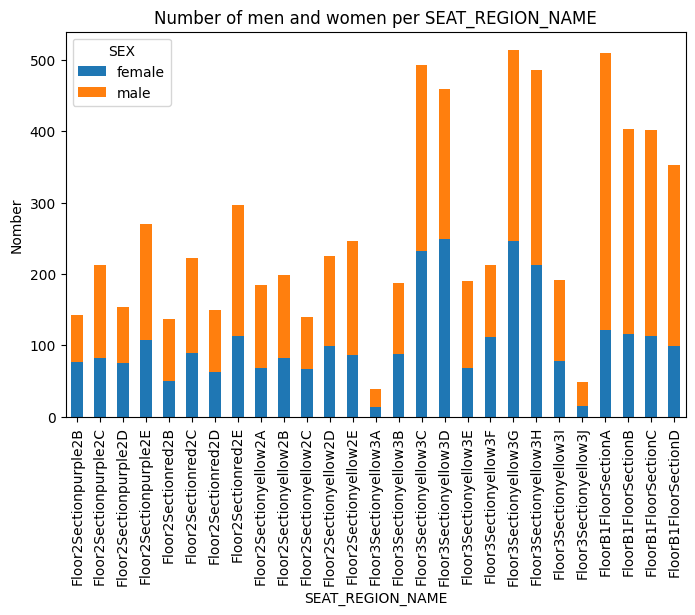

In [7]:
df_sex_by_seat_region = (
    df.groupby(["SEAT_REGION_NAME", "SEX"]).size().reset_index(name="Nombre")
)

df_sex_by_seat_region = df_sex_by_seat_region.pivot(
    index="SEAT_REGION_NAME", columns="SEX", values="Nombre"
)

df_sex_by_seat_region.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Number of men and women per SEAT_REGION_NAME")
plt.ylabel("Nomber")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

### Sex analyse by floor

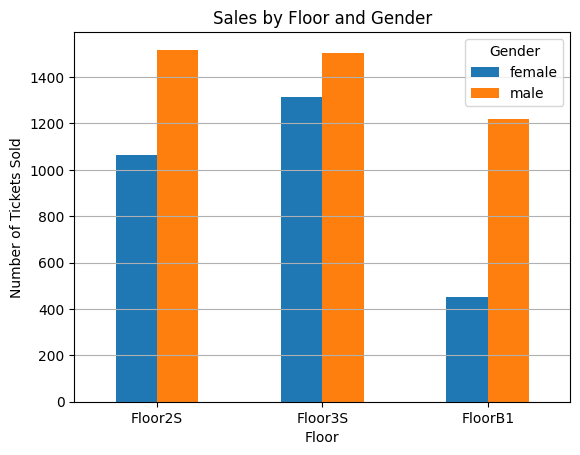

In [8]:
df_sex_by_floor = df_sex_by_seat_region.copy()

df_sex_by_floor.reset_index(inplace=True)
df_sex_by_floor.rename(columns={"index": "SEAT_REGION_NAME"}, inplace=True)

df_sex_by_floor["Floor"] = df_sex_by_floor["SEAT_REGION_NAME"].str[:7]
df_sex_by_floor = df_sex_by_floor.groupby("Floor").sum()

df_sex_by_floor.plot(kind="bar", ax=plt.gca())
plt.title("Sales by Floor and Gender")
plt.xlabel("Floor")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis="y")
plt.show()

## Membership analyse

### Membership analyse by region

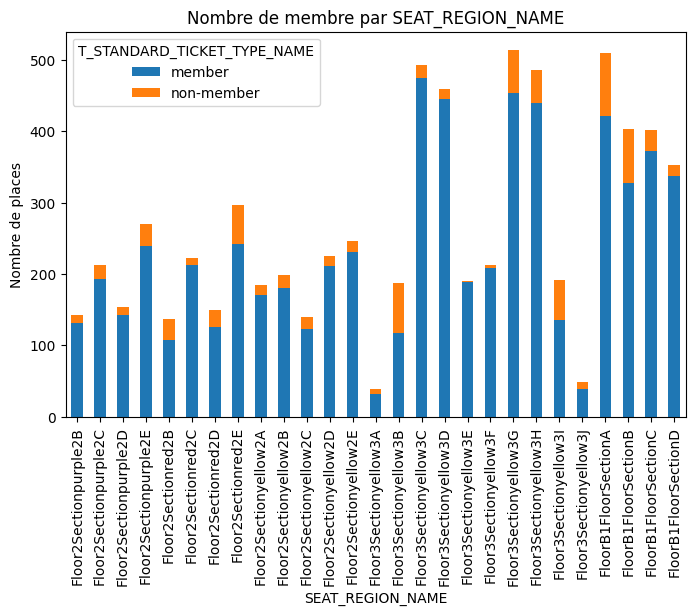

In [9]:
df_membership_by_seat_region = (
    df.groupby(["SEAT_REGION_NAME", "T_STANDARD_TICKET_TYPE_NAME"])
    .size()
    .reset_index(name="Nombre")
)
df_membership_by_seat_region = df_membership_by_seat_region.pivot(
    index="SEAT_REGION_NAME", columns="T_STANDARD_TICKET_TYPE_NAME", values="Nombre"
)
df_membership_by_seat_region.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Nombre de membre par SEAT_REGION_NAME")
plt.ylabel("Nombre de places")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

### Membership analyse by floor

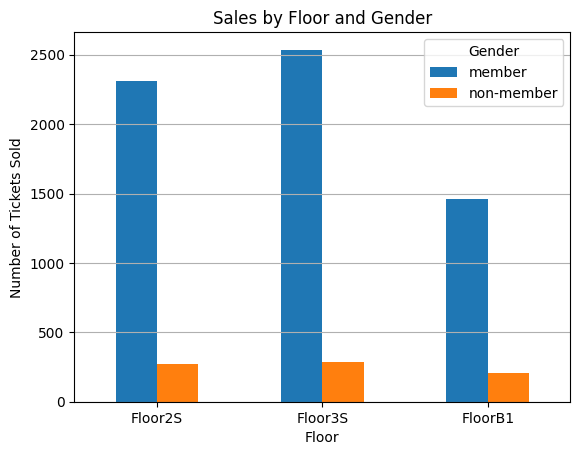

In [10]:
df_membership_by_floor = df_membership_by_seat_region.copy()

df_membership_by_floor.reset_index(inplace=True)
df_membership_by_floor.rename(columns={"index": "SEAT_REGION_NAME"}, inplace=True)

df_membership_by_floor["Floor"] = df_membership_by_floor["SEAT_REGION_NAME"].str[:7]
df_membership_by_floor = df_membership_by_floor.groupby("Floor").sum()

df_membership_by_floor.plot(kind="bar", ax=plt.gca())
plt.title("Sales by Floor and Gender")
plt.xlabel("Floor")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis="y")
plt.show()

## Correlation between gender and membership

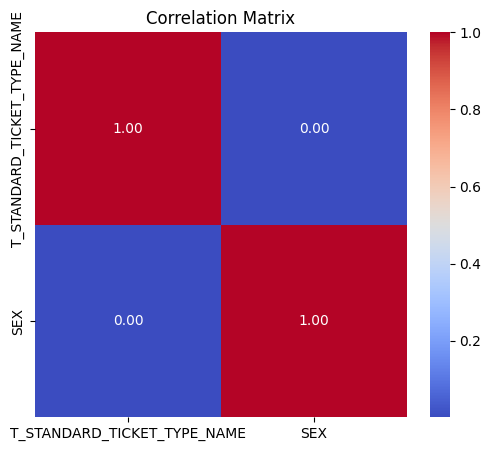

In [11]:
member_sex_corr = df.copy()

member_sex_corr["T_STANDARD_TICKET_TYPE_NAME"].replace(
    to_replace="member", value=1, inplace=True
)
member_sex_corr["T_STANDARD_TICKET_TYPE_NAME"].replace(
    to_replace="non-member", value=0, inplace=True
)

member_sex_corr["SEX"].replace(to_replace="male", value=1, inplace=True)
member_sex_corr["SEX"].replace(to_replace="female", value=0, inplace=True)

main_matric = member_sex_corr.corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(
    main_matric,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
)

plt.title(f"Correlation Matrix")
plt.show()

# Task 2
> Please define the "sale speed" of each zone. Provide the detail about how your group will define the "sale speed" carefully, and be creative !!:
> Use your defined "sale speed' to compare the ticket sale of different zones. find any interesting insight from the result.